In [30]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import skew
import scipy.stats as st
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('stroke_brain_data.csv')
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602,never smoked,1


In [3]:
datos_age = np.round(np.array(df['age']), decimals=2, out=None)
datos_age

array([61.  , 59.  , 78.  , 57.  , 58.  , 59.  , 63.  , 75.  , 76.  ,
       78.  , 63.  , 78.  , 75.  , 76.  , 51.  , 66.  , 58.  , 58.  ,
       76.  , 72.  , 78.  , 75.  , 38.  , 65.  , 79.  , 76.  , 71.  ,
        1.32, 79.  , 64.  , 79.  , 78.  , 80.  , 77.  , 61.  , 79.  ,
       74.  , 76.  , 74.  , 71.  , 34.  , 76.  , 63.  , 61.  , 54.  ,
       40.  , 48.  , 61.  , 31.  , 43.  ,  9.  , 52.  , 77.  , 17.  ,
       71.  , 35.  , 23.  , 40.  , 23.  , 71.  , 13.  , 73.  ,  3.  ,
       51.  , 35.  , 73.  ,  6.  , 46.  , 71.  , 54.  , 80.  , 49.  ,
       72.  , 25.  , 27.  , 51.  , 48.  ,  7.  , 61.  , 25.  , 30.  ,
       71.  , 47.  , 76.  , 29.  , 48.  , 57.  , 58.  , 45.  , 66.  ,
       59.  , 34.  , 69.  , 66.  , 48.  , 32.  , 60.  , 30.  , 60.  ,
       10.  , 20.  , 77.  , 67.  , 42.  , 60.  ,  0.48, 35.  , 50.  ,
       19.  , 77.  , 67.  , 20.  , 49.  , 77.  , 52.  , 43.  , 69.  ,
       34.  , 78.  , 76.  , 62.  , 71.  , 79.  , 79.  , 54.  , 73.  ,
        5.  , 38.  ,

In [4]:
datos_bmi = np.round(np.array(df['bmi']), decimals=2, out=None)
datos_bmi

array([31.56, 30.24, 30.7 , 33.81, 31.38, 33.48, 30.04, 28.32, 28.4 ,
       29.14, 31.6 , 29.32, 28.32, 27.95, 30.49, 29.29, 30.  , 30.2 ,
       28.2 , 32.12, 29.21, 28.07, 29.86, 29.58, 27.97, 27.94, 28.95,
       18.72, 29.14, 29.79, 28.76, 27.09, 27.28, 28.08, 32.95, 27.24,
       28.74, 31.68, 28.07, 30.76, 29.7 , 33.08, 29.97, 30.86, 33.74,
       30.07, 31.7 , 30.  , 31.2 , 29.85, 20.02, 33.12, 28.98, 26.42,
       29.02, 29.79, 27.  , 30.07, 28.38, 30.38, 22.56, 30.2 , 18.9 ,
       33.75, 29.61, 28.6 , 20.51, 31.61, 32.27, 31.9 , 27.41, 29.88,
       28.55, 27.17, 28.9 , 32.29, 33.7 , 19.48, 33.75, 27.24, 29.28,
       30.72, 32.06, 28.33, 28.62, 30.01, 35.19, 30.27, 30.01, 30.54,
       31.38, 29.9 , 30.62, 29.19, 33.17, 29.75, 31.38, 29.28, 32.13,
       20.26, 26.31, 28.  , 29.08, 32.5 , 31.9 , 17.9 , 29.83, 31.98,
       26.28, 29.66, 28.94, 26.59, 30.19, 27.96, 31.79, 29.98, 30.57,
       31.48, 28.02, 28.03, 32.44, 30.56, 30.5 , 27.41, 30.16, 33.9 ,
       19.03, 33.54,

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             201 non-null    object 
 1   age                201 non-null    float64
 2   hypertension       201 non-null    int64  
 3   heart_disease      201 non-null    int64  
 4   ever_married       201 non-null    object 
 5   work_type          201 non-null    object 
 6   Residence_type     201 non-null    object 
 7   avg_glucose_level  201 non-null    float64
 8   bmi                201 non-null    float64
 9   smoking_status     201 non-null    object 
 10  stroke             201 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 17.4+ KB


In [17]:
#1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
    #Tabla de contingencia

crosstab1=pd.crosstab(df['gender'],df['ever_married'])
print(crosstab1)
print('-------------------------------------')

crosstab2=pd.crosstab(df['work_type'],df['Residence_type'])
print(crosstab2)
print('-------------------------------------')

crosstab3=pd.crosstab(df['gender'],df['smoking_status'])
print(crosstab3)
print('-------------------------------------')

crosstab4=pd.crosstab(df['ever_married'],df['smoking_status'])
print(crosstab4)
print('-------------------------------------')

#Las tablas muestran la relación de dos variables con respecto a los infartos cerebrales. 

ever_married  No  Yes
gender               
Female        29   68
Male          23   81
-------------------------------------
Residence_type  Rural  Urban
work_type                   
Govt_job           10     17
Private            56     58
Self-employed      22     22
children            7      9
-------------------------------------
smoking_status  Unknown  formerly smoked  never smoked  smokes
gender                                                        
Female               25               19            26      27
Male                 36               29            14      25
-------------------------------------
smoking_status  Unknown  formerly smoked  never smoked  smokes
ever_married                                                  
No                   23               11             6      12
Yes                  38               37            34      40
-------------------------------------


In [22]:
    #Coeficiente de correlación de las variables numéricas del dataset.

coef1=np.corrcoef(df['age'],df['hypertension'])
print(coef1)
print('-------------------------------------')
coef2=np.corrcoef(df['heart_disease'],df['avg_glucose_level'])
print(coef2)
print('-------------------------------------')
coef3=np.corrcoef(df['bmi'],df['stroke'])
print(coef3)
print('-------------------------------------')


#Las variables cuantitativas utilizadas para conocer la correlación entre ellas, están muy poco correlacionadas según los tres resultados obtenidas.

[[1.         0.23469962]
 [0.23469962 1.        ]]
-------------------------------------
[[1.         0.15500859]
 [0.15500859 1.        ]]
-------------------------------------
[[1.         0.00366273]
 [0.00366273 1.        ]]
-------------------------------------


-0.6571139173306693
-------------------------------------
-1.7259135697729306
-------------------------------------
1.5077954784946597
-------------------------------------


<AxesSubplot:ylabel='Frequency'>

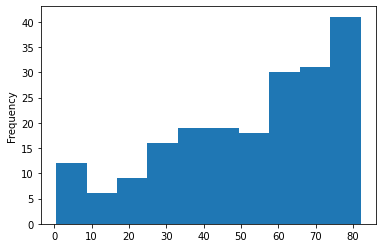

In [29]:
    #Sesgos de alguna de las variables numéricas del dataset.

sesgo1=skew(df['age'])
print(sesgo1)
print('-------------------------------------')

sesgo2=skew(df['bmi'])
print(sesgo2)
print('-------------------------------------')

sesgo3=skew(df['stroke'])
print(sesgo3)
print('-------------------------------------')

df['age'].plot.hist()

#Los dos primeros conjuntos de datos están sesgados a la izquierda(resultado negativo), el último está sesgado a la derecha. 
# Lo podemos comprobar con el gráfico de barras.

In [37]:
    #Intervalo de confianza de algunas de las variables numéricas del dataset

st.t.interval(alpha=0.95, df=len(datos_age)-1, loc=np.mean(datos_age), scale=st.sem(datos_age))

#El resultado que nos da nos indica que hay un 95% de probabilidades de que un número aleatorio de este conjunto de datos(edad) esté dentro de ese rango.

(48.950924496317526, 55.14738396139393)